# Two Fluid Quantum Cosmological Model

In [1]:
# Importing the relevant libraries

import sys
import math
import numpy as np                                                # imports the Numpy Library

from tqdm import tqdm

import matplotlib.pyplot as plt

from numcosmo_py import Nc, Ncm                                   # imports the NumCosmo library
from numcosmo_py.plotting.tools import set_rc_params_article      # imports Numcosmo plotting tools

Ncm.cfg_init()                                                    # starts the NumCosmo library

# Introduction

In this notebook we shall analyze the predictions a two fluid quantum cosmological model where gravity is coupled though matter using the Wheeler-De Witt equation.

A single fluid with equation of state $p(\rho) = w\rho$ was considered in $\tt \text{arXiv:0610205}$ , using the framework of Bohmian mechanics. At background level, it lead to a non-singular scale factor. At perturbative level, the primordial spectrum of adiabatic perturbations was found to be approximately scale invariant, with

$${\cal P}_{\zeta}(k \gg 1) \approx A_{s}k^{n_{s} - 1}\, , $$
$$ n_{s} = 1 + \frac{12w}{1 + 3w}\, ,$$

for which the explicit value for dust $w \approx 0$ and radiation $w=1/3$ are given by

In [2]:
def nsw(w):                             # defines a function that calculates the single fluid spectral index ns
  return 1 + 12*w/(1+3*w)

print(r'w=0 => '+str(nsw(0)))           # dust w=0 spectral index
print(r'w=1/3 => '+str(nsw(1/3)))       # radiation w = 1/3 spectral index

w=0 => 1.0
w=1/3 => 3.0


The above results mean that ordinary matter cannot describe the approximately flat red spectrum with $n_{s}$. Therefore, a natural extension of said model is to consider the two fluid coupled to geometry.

Said model was analyzed at background level with great detail in $\tt \text{arXiv:0505109}$ , where it was found that the obtained scale factor is also non-singular. However, the perturbative analysis has not yet been performed due to theoretical difficulties.

Reference $\tt \text{arXiv:1510.06628}$ analyzes the cosmological perturbations formalism for $N$ fluid models. In the 2 fluid case, the obtained Hamiltonian that describes perturbations is given explicitly by

\begin{align}
    \delta {\cal H}^{(2,s)} & = \frac{1}{2m_{z}}P_{\zeta}^{2} + \frac{1}{2m_{S}}P_{Q}^{2} + \left({ \frac{ \bar{c}_{n} }{ \bar{c}_{S}\bar{c}_{m} } }^{2}\frac{1}{m_{z}m_{S}}\frac{1}{NH}\right)P_{\zeta}P_{Q} \\
    %
    & \, \, + \frac{1}{2}m_{z}\nu_{\zeta}^{2} z^{2} + \frac{1}{2}m_{S}\nu_{S}^{2}Q^{2} \, ,
\end{align}

where $\zeta$ and $Q$ denote adiabatic and entropy perturbations, respectively. We also introduced

\begin{align*}
    m_{z}  \equiv \frac{ a^{3}({ \bar{\rho} + \bar{p} }) }{N\bar{c}_{S}^{2}\bar{H}^{2} }\, , \hspace{2.4cm} & \hspace{-0.1cm} m_{S}  \equiv \frac{ 1 }{  N a^{3}\bar{c}_{m}^2\bar{\omega} } \, ,  \\
    %
    \nu_{z}^{2} \equiv \bar{c}_{S}^{2}F^{2}_{k} \, , \hspace{3.15cm} & \hspace{0.05cm} \nu_{S}^{2} \equiv {c}_{m}^{2}F^{2}_{k} \, ,  \\
    %
    \bar{c}_{S}^{2} \equiv \bar{c}_{1}^{2}\cos^{2}\phi+\bar{c}_{2}^{2}\sin^{2}\phi \, , \hspace{1cm} & \bar{c}_{m}^{2} \equiv \bar{c}_{2}^{2}\cos^{2}\phi+\bar{c}_{1}^{2}\sin^{2}\phi
    \, .
\end{align*}

where $\bar{\omega} \equiv (\rho_1 + p_1)(\rho_2 + p_2)/(\rho + p)$ and $\bar{c}_{n}^{2} \equiv \bar{c}_{1}^{2} - \bar{c}_{2}^{2}$. Here, for later convenience, we have also introduced the angular variable $\phi$ and the functions $F_{k}(t)$ by

\begin{equation}
 \cos^{2}\phi \equiv \frac{ \rho_1 + p_1 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \sin^{2}\phi \equiv \frac{ \rho_2 + p_2 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \hspace{0.8cm} F^{2}_{k} \equiv \left({\frac{ Nk }{ a }}\right)^{2}\, ,
\end{equation}

the angular variable $\phi$ is also associated to the dominant fluid, with $\phi=0$ denoting domination by the fluid $1$ and $\phi=\pi/2$ denoting domination by the fluid $2$.


By direct inspection of the perturbative Hamiltonian, one sees that the equations of motion for perturbations are coupled. While at classical level this could be solved by numerical methods, at quantum level this demands the use of special quantization techniques to define the associated vacuum state and extract predictions, as proposed by $\tt \text{arXiv:1510.06628}$.

Therefore in this notebook, we analyze explicitly the background and perturbative quantities, with our final aim to calculate the modes $\zeta_{k}, Q_{k}$ and their associated power spectrum.

# Background Quantities

In this section we study the quantities $m_{S}, m_{Q}, \phi, c^{2}_{S}, c^{2}_{m}$ that occur in the perturbative Hamiltonian. We also study the evolution of the eigenvalues $\nu_{1}, \nu_{2}$ that diagonalize the Hamiltonian tensor. Finally, we study the behavior of the coupling matrices $\gamma_{ij}, \tau_{ij}$, which define the dynamics of the relevant perturbative quantities.

To do so, we start by defining our cosmological parameters.

In [3]:
cosmo = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
cosmo.props.w = 1.0e-5                                      # dust/dark matter equation of state
cosmo.props.Omegar = 2.0 * (1.0e-8)                         # radiation abundance today
cosmo.props.Omegaw = 2.0 * (1.0 - 1.0e-8)                   # dust/dark matter abundance today
cosmo.props.xb = 1.0e30                                     # inverse scale factor x=1/a at the time of the bounce

To study the behavior of said quantities, we shall vary our cosmological parameters. However, before we dwell into such analysis, let's perform a consistency check by considering the dust only $\Omega_{r} = 0$ and radiation only $\Omega_{w} = 0$ cases. The complete model shall present regimes of domination by each fluid, and we shall also check if we indeed recover the $n_{s}$ values for the single fluid case.

## Consistency Check

## Evolution of ....

In [4]:
k = 1.0
min_alpha_c = -120.0
max_alpha_c = -1.0
min_alpha_scale = 1.0e-12
np_plot = 100

# Time arrays for the contraction and bounce phases

alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)
alpha_b_e = np.geomspace(min_alpha_scale, 2.0, np_plot)
alpha_b = np.concatenate((np.flip(-alpha_b_e), alpha_b_e))

In [5]:
cosmo.eom_eval(-120,-1)
#m_s_c = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_c])
#print(m_s_c)
#m_zeta_c = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_c])

<NumCosmo.HIPertITwoFluidsEOM object at 0x72ca632b9490 (NcHIPertITwoFluidsEOM at 0x597f01479840)>

In [6]:
cosmo.eom_eval(-120,1).nu1
#cosmo.props.m_s

46657882087.38496

In [7]:
# Computing background observables in the contraction phase

m_s_c = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_c])
m_zeta_c = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_c])
mnu2_s_c = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_c])
mnu2_zeta_c = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_c])
nu1_c = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_c])
nu2_c = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_c])
nu_s_c = np.sqrt(mnu2_s_c / m_s_c)
nu_zeta_c = np.sqrt(mnu2_zeta_c / m_zeta_c)
y_c = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_c])
gamma11_c = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_c])
gamma22_c = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_c])
gamma12_c = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_c])
tau_c = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_c])

# Computing background observables in the bounce phase

m_s_b = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_b])
m_zeta_b = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_b])
mnu2_s_b = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_b])
mnu2_zeta_b = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_b])
nu1_b = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_b])
nu2_b = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_b])
nu_s_b = np.sqrt(mnu2_s_b / m_s_b)
nu_zeta_b = np.sqrt(mnu2_zeta_b / m_zeta_b)
y_b = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_b])
gamma11_b = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_b])
gamma22_b = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_b])
gamma12_b = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_b])
tau_b = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_b])

cos2_phi_c = (nu1_c**2 * nu_zeta_c**2 - nu2_c**2 * nu_s_c**2) / (nu1_c**4 - nu2_c**4)
sin2_phi_c = (nu1_c**2 * nu_s_c**2 - nu2_c**2 * nu_zeta_c**2) / (nu1_c**4 - nu2_c**4)

cos2_phi_b = (nu1_b**2 * nu_zeta_b**2 - nu2_b**2 * nu_s_b**2) / (nu1_b**4 - nu2_b**4)
sin2_phi_b = (nu1_b**2 * nu_s_b**2 - nu2_b**2 * nu_zeta_b**2) / (nu1_b**4 - nu2_b**4)



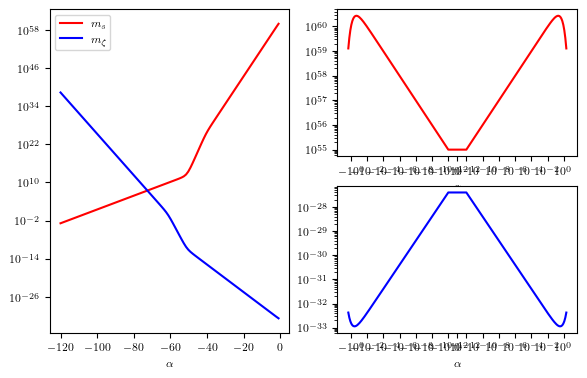

In [8]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

ax1.plot(alpha_c, m_s_c, c='r', label=r'$m_s$')
ax1.plot(alpha_c, m_zeta_c, c='b', label=r'$m_\zeta$')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')

ax2.plot(alpha_b, m_s_b, c='r', label=r'$m_s$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')

ax3.plot(alpha_b, m_zeta_b, c='b', label=r'$m_\zeta$')
ax3.set_xscale('symlog', linthresh=min_alpha_scale)
ax3.set_yscale('log')
ax3.set_xlabel(r'$\alpha$')

ax1.legend()

pass

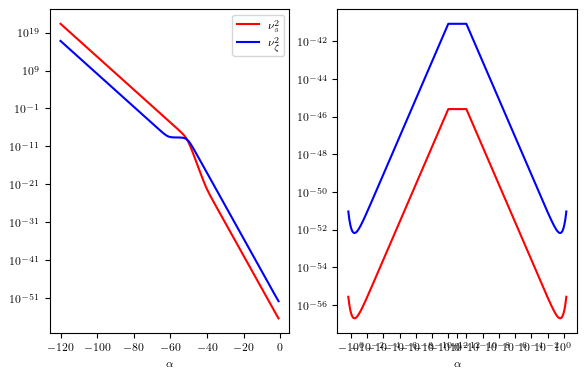

In [9]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c, mnu2_s_c / m_s_c, c='r', label=r'$\nu_s^2$')
ax1.plot(alpha_c, mnu2_zeta_c / m_zeta_c, c='b', label=r'$\nu_\zeta^2$')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_b, mnu2_s_b / m_s_b, c='r', label=r'$\nu_s^2$')
ax2.plot(alpha_b, mnu2_zeta_b / m_zeta_b, c='b', label=r'$\nu_\zeta^2$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')

pass

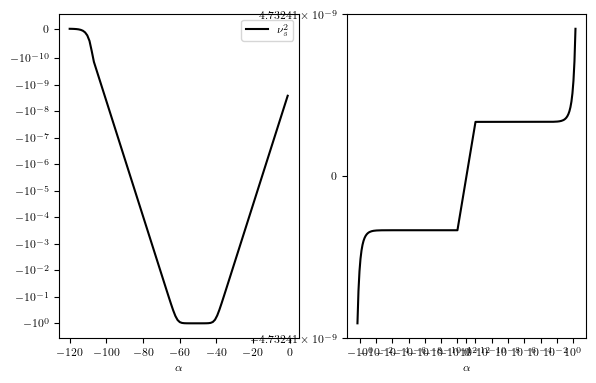

In [10]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c, y_c * np.sqrt(m_s_c * m_zeta_c), c='k', label=r'$\nu_s^2$')
ax1.set_yscale('symlog', linthresh=1.0e-10)
ax1.set_xlabel(r'$\alpha$')

ax2.plot(alpha_b, y_b * np.sqrt(m_s_b * m_zeta_b), c='k', label=r'$\nu_s^2$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('symlog')
ax2.set_xlabel(r'$\alpha$')

ax1.legend()

pass

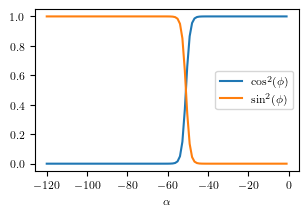

In [11]:
set_rc_params_article(ncol=1)
fig = plt.figure()

ax1= fig.add_subplot(1,1,1)

ax1.plot(alpha_c, cos2_phi_c, label=r'$\cos^2(\phi)$')
ax1.plot(alpha_c, sin2_phi_c, label=r'$\sin^2(\phi)$')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()
pass

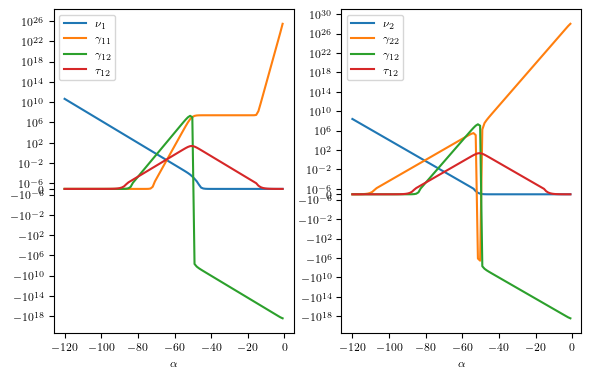

In [12]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c, nu1_c, label=r'$\nu_1$')
ax1.plot(alpha_c, gamma11_c, label=r'$\gamma_{11}$')
ax1.plot(alpha_c, gamma12_c, label=r'$\gamma_{12}$')
ax1.plot(alpha_c, tau_c, label=r'$\tau_{12}$')

ax1.set_yscale('symlog', linthresh=1.0e-6)
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c, nu2_c, label=r'$\nu_2$')
ax2.plot(alpha_c, gamma22_c, label=r'$\gamma_{22}$')
ax2.plot(alpha_c, gamma12_c, label=r'$\gamma_{12}$')
ax2.plot(alpha_c, tau_c, label=r'$\tau_{12}$')

ax2.set_yscale('symlog', linthresh=1.0e-6)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

pass

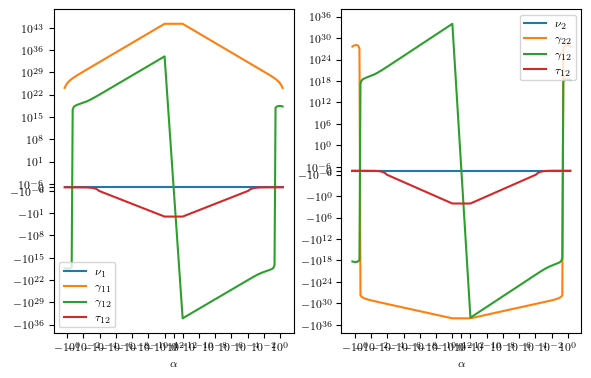

In [13]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_b, nu1_b, label=r'$\nu_1$')
ax1.plot(alpha_b, gamma11_b, label=r'$\gamma_{11}$')
ax1.plot(alpha_b, gamma12_b, label=r'$\gamma_{12}$')
ax1.plot(alpha_b, tau_b, label=r'$\tau_{12}$')
ax1.set_xscale('symlog', linthresh=min_alpha_scale)
ax1.set_yscale('symlog', linthresh=1.0e-6)
ax1.set_xlabel(r'$\alpha$')

ax1.legend()

ax2.plot(alpha_b, nu2_b, label=r'$\nu_2$')
ax2.plot(alpha_b, gamma22_b, label=r'$\gamma_{22}$')
ax2.plot(alpha_b, gamma12_b, label=r'$\gamma_{12}$')
ax2.plot(alpha_b, tau_b, label=r'$\tau_{12}$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('symlog', linthresh=1.0e-6)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

pass

# Perturbative Quantities

In [14]:
def get_zeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.ZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.ZETA_I)

def get_S(v):
    return v.get(Nc.HIPertITwoFluidsVars.S_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.S_I)

def get_Pzeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.PZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PZETA_I)

def get_PS(v):
    return v.get(Nc.HIPertITwoFluidsVars.PS_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PS_I)


In [15]:
def integrate_mode1(k, max_time=-1.0):
    # Defining relative tolerance for integration
    prec = 1.0e-7
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-13

    pert = Nc.HIPertTwoFluids.new()
    pert.set_stiff_solver(True)
    pert.props.reltol = prec
    pert.set_mode_k(k)
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)
    ci = Ncm.Vector.new(8)
    alphai = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    pert.get_init_cond_zetaS(cosmo, alphai, 1, 0.25 * math.pi, ci)
    pert.set_init_cond(cosmo, alphai, 1, False, ci)

    res = pert.evolve_array(cosmo, max_time)
    res_a = np.array(res.dup_array()).reshape(-1,9)

    return res_a

def integrate_mode2(k, max_time=-1.0):
    # Defining relative tolerance for integration
    prec = 1.0e-7
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-5

    pert = Nc.HIPertTwoFluids.new()
    pert.set_stiff_solver(True)
    pert.props.reltol = prec
    pert.set_mode_k(k)
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)
    ci = Ncm.Vector.new(8)
    alphai = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size)
    pert.get_init_cond_zetaS(cosmo, alphai, 2, 0.25 * math.pi, ci)
    pert.set_init_cond(cosmo, alphai, 2, False, ci)

    res = pert.evolve_array(cosmo, max_time)
    res_a = np.array(res.dup_array()).reshape(-1,9)

    return res_a


In [ ]:
res1_a = integrate_mode1(1.0e8, -1.0)
res2_a = integrate_mode2(1.0e8, -1.0)

In [34]:
def integrate_mode1_qp(k, max_time=-1.):
    # Defining relative tolerance for integration
    prec = 1.0e-11
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-13

    pert = Nc.HIPertTwoFluids.new()
    pert.set_stiff_solver(True)
    pert.props.reltol = prec
    pert.set_mode_k(k)
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)
    ci = Ncm.Vector.new(8)
    alphai = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    alphaf = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, 1.0)
    pert.get_init_cond_QP(cosmo, alphai, 1, 0.25 * math.pi, ci)
    pert.set_init_cond(cosmo, alphai, 1, True, ci)

    res = pert.evolve_array(cosmo, min(alphaf, max_time))
    res_a = np.array(res.dup_array()).reshape(-1,9)
    for row in res_a:
        alpha = row[0]
        ci.set_array(row[1:])
        pert.to_zeta_s(cosmo, alpha, ci)
        row[1:] = np.array(ci.dup_array())
    #print(f"A {max_time} {alphaf} {res_a[-1,0]}")

    if max_time > alphaf:
        pert.set_init_cond(cosmo, alphaf, 1, False, ci)
        res_c = pert.evolve_array(cosmo, max_time)
        res_c_a = np.array(res_c.dup_array()).reshape(-1,9)
        res_a = np.concatenate((res_a, res_c_a))

    return res_a, alphaf


def integrate_mode2_qp(k, max_time=-1.0):
    # Defining relative tolerance for integration
    prec = 1.0e-11
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-5

    pert = Nc.HIPertTwoFluids.new()
    pert.set_stiff_solver(True)
    pert.props.reltol = prec
    pert.set_mode_k(k)
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)
    ci = Ncm.Vector.new(8)
    alphai = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size)
    alphaf = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, 1.0)
    pert.get_init_cond_QP(cosmo, alphai, 2, 0.25 * math.pi, ci)
    pert.set_init_cond(cosmo, alphai, 2, True, ci)

    res = pert.evolve_array(cosmo, min(alphaf, max_time))
    res_a = np.array(res.dup_array()).reshape(-1,9)
    for row in res_a:
        alpha = row[0]
        ci.set_array(row[1:])
        pert.to_zeta_s(cosmo, alpha, ci)
        row[1:] = np.array(ci.dup_array())
    #print(f"B {max_time} {alphaf} {res_a[-1,0]}")

    if max_time > alphaf:
        pert.set_init_cond(cosmo, alphaf, 2, False, ci)
        res_c = pert.evolve_array(cosmo, max_time)
        res_c_a = np.array(res_c.dup_array()).reshape(-1,9)
        res_a = np.concatenate((res_a, res_c_a))

    return res_a, alphaf


In [35]:
res1_qp, alpha1_f = integrate_mode1_qp(1.0e1)
res2_qp, alpha2_f = integrate_mode2_qp(1.0e1)

In [36]:
zr_index = Nc.HIPertITwoFluidsVars.ZETA_R+1
zi_index = Nc.HIPertITwoFluidsVars.ZETA_I+1

sr_index = Nc.HIPertITwoFluidsVars.S_R+1
si_index = Nc.HIPertITwoFluidsVars.S_I+1

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

k_a = np.geomspace(1.0e-1, 1.0e4, 100)
Pk1 = []
Pk2 = []
for k in tqdm(k_a):
    res1_qp, alpha1_f = integrate_mode1_qp(k, -50.0)
    res2_qp, alpha2_f = integrate_mode2_qp(k, -35.0)
    Pkt1 = k**3*np.hypot(res1_qp[:,zr_index], res1_qp[:,zi_index])**2
    Pkt2 = k**3*np.hypot(res2_qp[:,zr_index], res2_qp[:,zi_index])**2
    ax1.plot(res1_qp[:,0], Pkt1, label="Mode1")
    ax1.set_yscale('log')
    
    ax2.plot(res2_qp[:,0], Pkt2, label="Mode2")
    ax2.set_yscale('log')

    Pk1.append(Pkt1[-1])
    Pk2.append(Pkt2[-1])

#plt.legend()
pass

  1%|██                                                                                                                                                                                                       | 1/100 [00:03<05:17,  3.21s/it]

In [20]:
set_rc_params_article(ncol=2)
fig = plt.figure()

b, a = np.polyfit(np.log(k_a), np.log(Pk2), 1)

ax1 = fig.add_subplot(2,1,1)
ax1.plot(k_a, Pk2)
ax1.plot(k_a, np.exp(a+b*np.log(k_a)))
ax1.set_xscale('log')
ax1.set_yscale('log')

plt.show()
b+1

NameError: name 'k_a' is not defined

<Figure size 680.78x420.745 with 0 Axes>

array([-8.13964193e-03,  1.06259987e+02])

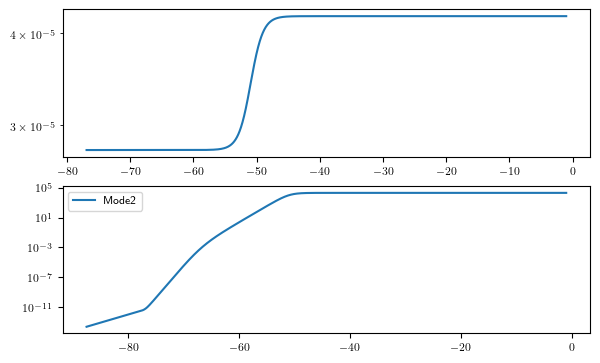

In [37]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(res1_qp[:,0], np.hypot(res1_qp[:,sr_index], res1_qp[:,si_index]), label="Mode1")
ax1.set_yscale('log')

ax2.plot(res2_qp[:,0], np.hypot(res2_qp[:,sr_index], res2_qp[:,si_index]), label="Mode2")
ax2.set_yscale('log')

plt.legend()
pass

In [38]:
print(f"Number of time steps: Mode1 {res1_a.shape} Mode2 {res2_a.shape}")


Number of time steps: Mode1 (207222, 9) Mode2 (153237, 9)


In [39]:
zr_index = Nc.HIPertITwoFluidsVars.ZETA_R+1
zi_index = Nc.HIPertITwoFluidsVars.ZETA_I+1

sr_index = Nc.HIPertITwoFluidsVars.S_R+1
si_index = Nc.HIPertITwoFluidsVars.S_I+1

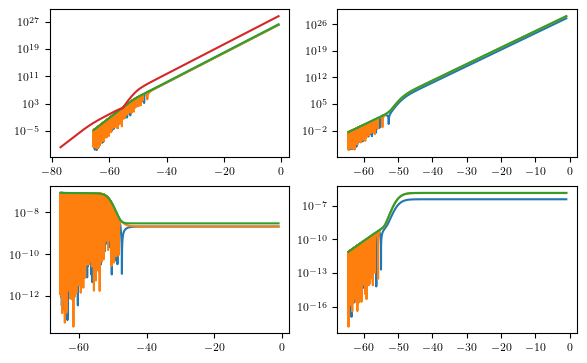

In [43]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

ax1.plot(res1_a[:,0], np.abs(res1_a[:,zr_index]))
ax1.plot(res1_a[:,0], np.abs(res1_a[:,zi_index]))
ax1.plot(res1_a[:,0], np.hypot(res1_a[:,zr_index], res1_a[:,zi_index]))
ax1.plot(res1_qp[:,0], np.hypot(res1_qp[:,zr_index], res1_qp[:,zi_index]))
ax1.set_yscale('log')

ax2.plot(res2_a[:,0], np.abs(res2_a[:,zr_index]))
ax2.plot(res2_a[:,0], np.abs(res2_a[:,zi_index]))
ax2.plot(res2_a[:,0], np.hypot(res2_a[:,zr_index], res2_a[:,zi_index]))
ax2.set_yscale('log')

ax3.plot(res1_a[:,0], np.abs(res1_a[:,sr_index]))
ax3.plot(res1_a[:,0], np.abs(res1_a[:,si_index]))
ax3.plot(res1_a[:,0], np.hypot(res1_a[:,sr_index], res1_a[:,si_index]))
ax3.set_yscale('log')

ax4.plot(res2_a[:,0], np.abs(res2_a[:,sr_index]))
ax4.plot(res2_a[:,0], np.abs(res2_a[:,si_index]))
ax4.plot(res2_a[:,0], np.hypot(res2_a[:,sr_index], res2_a[:,si_index]))
ax4.set_yscale('log')


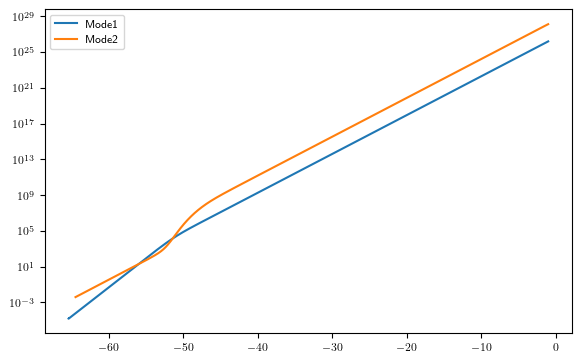

In [45]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,1,1)

ax1.plot(res1_a[:,0], np.hypot(res1_a[:,zr_index], res1_a[:,zi_index]), label="Mode1")
ax1.plot(res2_a[:,0], np.hypot(res2_a[:,zr_index], res2_a[:,zi_index]), label="Mode2")
ax1.set_yscale('log')

plt.legend()
pass

In [31]:
pert_tmp = Nc.HIPertTwoFluids.new()
pert_tmp.set_mode_k(1.0e0)
ci1 = Ncm.Vector.new(8)

zeta1_wkb = []
for t in res1_a[:,0]:
    pert_tmp.get_init_cond_zetaS(cosmo, t, 1, 0.25 * math.pi, ci1)
    zeta1_wkb.append(np.hypot(ci1.get(Nc.HIPertITwoFluidsVars.ZETA_R), ci1.get(Nc.HIPertITwoFluidsVars.ZETA_I)))

zeta2_wkb = []
for t in res2_a[:,0]:
    pert_tmp.get_init_cond_zetaS(cosmo, t, 2, 0.25 * math.pi, ci1)
    zeta2_wkb.append(np.hypot(ci1.get(Nc.HIPertITwoFluidsVars.ZETA_R), ci1.get(Nc.HIPertITwoFluidsVars.ZETA_I)))

s1_wkb = []
for t in res1_a[:,0]:
    pert_tmp.get_init_cond_zetaS(cosmo, t, 1, 0.25 * math.pi, ci1)
    s1_wkb.append(np.hypot(ci1.get(Nc.HIPertITwoFluidsVars.S_R), ci1.get(Nc.HIPertITwoFluidsVars.S_I)))

s2_wkb = []
for t in res2_a[:,0]:
    pert_tmp.get_init_cond_zetaS(cosmo, t, 2, 0.25 * math.pi, ci1)
    s2_wkb.append(np.hypot(ci1.get(Nc.HIPertITwoFluidsVars.S_R), ci1.get(Nc.HIPertITwoFluidsVars.S_I)))



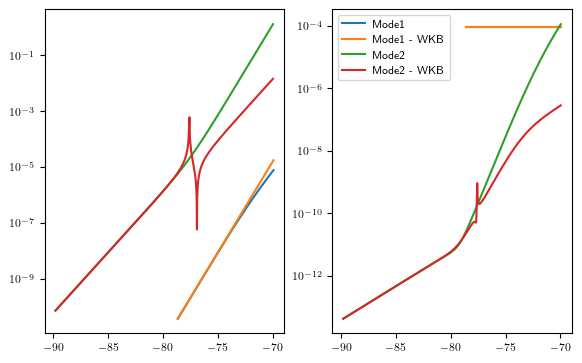

In [32]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(res1_a[:,0], np.hypot(res1_a[:,zr_index], res1_a[:,zi_index]), label="Mode1")
ax1.plot(res1_a[:,0], zeta1_wkb, label="Mode1 - WKB")

ax1.plot(res2_a[:,0], np.hypot(res2_a[:,zr_index], res2_a[:,zi_index]), label="Mode2")
ax1.plot(res2_a[:,0], zeta2_wkb, label="Mode2 - WKB")

ax1.set_yscale('log')

ax2.plot(res1_a[:,0], np.hypot(res1_a[:,sr_index], res1_a[:,si_index]), label="Mode1")
ax2.plot(res1_a[:,0], s1_wkb, label="Mode1 - WKB")

ax2.plot(res2_a[:,0], np.hypot(res2_a[:,sr_index], res2_a[:,si_index]), label="Mode2")
ax2.plot(res2_a[:,0], s2_wkb, label="Mode2 - WKB")

ax2.set_yscale('log')

ax1.relim()
ax1.autoscale_view()

ax2.relim()
ax2.autoscale_view()

plt.legend()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 54.86it/s]


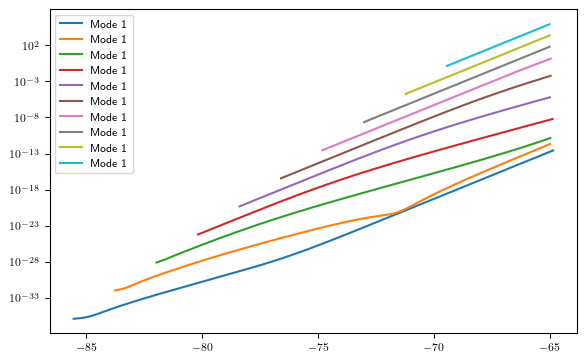

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


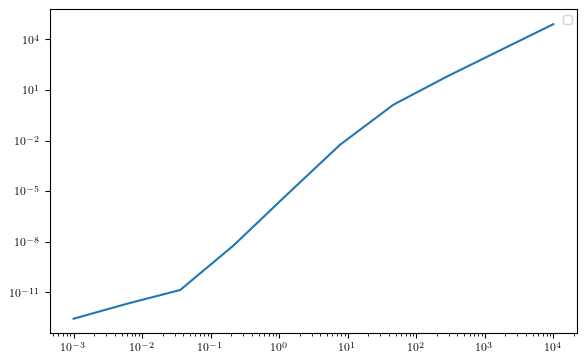

In [41]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,1,1)

k_a = np.geomspace(1.0e-3, 1.0e4, 10)
Pk_a = []
for k in tqdm(k_a):
    res_a = integrate_mode1(k, -65.0)

    Pkt = k**(3)*np.hypot(res_a[:,zr_index], res_a[:,zi_index])**2
    ax1.plot(res_a[:,0], Pkt, label="Mode 1")
    Pk_a.append(Pkt[-1])

ax1.set_yscale('log')
plt.legend()
plt.show()

fig = plt.figure()
ax1= fig.add_subplot(1,1,1)

ax1.plot(k_a, Pk_a)

ax1.set_xscale('log')
ax1.set_yscale('log')
plt.legend()
plt.show()



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 428.24it/s]


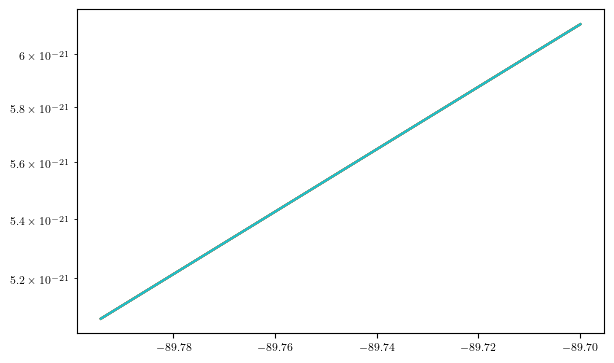

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


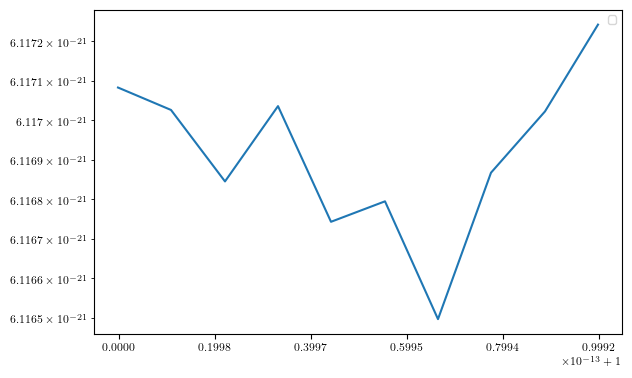

In [70]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,1,1)

k_a = np.linspace(1.0, 1.0 + 1.0e-13, 10)
Pk_a = []
for k in tqdm(k_a):
    res_a = integrate_mode2(k, -89.7)

    Pkt = k**(3)*np.hypot(res_a[:,zr_index], res_a[:,zi_index])**2
    ax1.plot(res_a[:,0], Pkt, label="Mode 1")
    Pk_a.append(Pkt[-1])

ax1.set_yscale('log')
#plt.legend()
plt.show()

fig = plt.figure()
ax1= fig.add_subplot(1,1,1)

ax1.plot(k_a, Pk_a)

#ax1.set_xscale('log')
ax1.set_yscale('log')
plt.legend()
plt.show()



In [67]:
res_a[0]

array([-8.97943035e+01,  5.03244272e-11,  2.98009714e-14,  4.98998640e+09,
        1.13014792e-04,  5.03244272e-11,  3.02036061e-14, -4.94554646e+09,
       -1.12008002e-04])